The W boson is a fundamental particle. Together with the Z boson, it is responsible for the weak force, one of four fundamental forces that govern the behaviour of matter in our universe. W boson pair production occurs via:

*   **quark–antiquark annihilation** : (antiquark)(quark) → W+W−
*   **diphoton process** : γγ → W+W− 


*   **gluon fusion** : gg → W+W−



W boson pair production is an important process for checks of the gauge structure of the Standard Model and the search for new physics. It is an irreducible background for many Higgs boson studies and new physics searches. W
 bosons can decay either:


*   **leptonically**: into an electron or muon and neutrino.
*   **hadronically**: into an up-type quark and a down-type quark.

Leptonic W boson decays are characterised by the presence of a highly energetic isolated lepton and large missing transverse momentum. Missing transverse momentum can occur due to neutrinos escaping detection.

Hadronic W boson decays lead to the presence of two jets due to the two quarks.

source: [opendata.atlas.cern](http://opendata.atlas.cern/books/current/get-started/_book/analyses.html)





For my work, I will consider two events here (**Wmunu** & **Wenu**) as follows:


*   **Wmunu** : An event was selected if there was one (and only one) global muon in the event that satisfies: pT > 25.0 GeV and |eta| < 2.1. Furthermore, the event was rejected if there was another global muon in the event with pT > 10 GeV in the acceptance region |eta| < 2.4.

*   **Wenu** : An event was selected if there was one electron in the event with pT > 25.0 GeV. Furthermore, the event was rejected if there was a second electron present with pT > 20 GeV.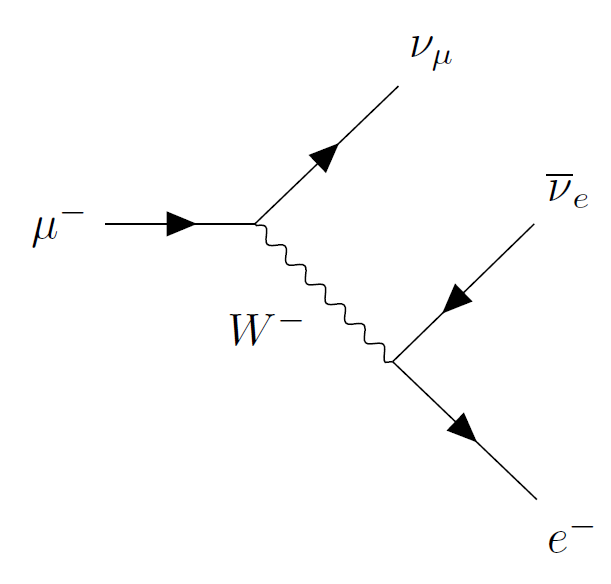



I use two datasets, which are available on the CERN Open Data portal, `Wmunu.csv` and `Wenu.csv`, each of which contains 100,000 records. Datasets derived from the Run2011A. These data were selected from the primary datasets in order to obtain candidate w boson events. More details on datasets can be found in http://opendata.cern.ch/record/545.

I use TensorFlow to create a model that can distinguish between two events (**Wmunu** & **Wenu**). To do this, every record in `Wmunu.csv` is labeled with 0 and every record in `Wenu.csv` is labeled with 1. These two datasets are then merged.



Content:

1) Run: The run number of the event.

2) Event: The event number.

3) pt: The transverse momentum of the lepton (in units of GeV), either a muon or an electron.

4) eta: The pseudorapidity of the lepton, either a muon or an electron.

5) phi: The phi angle (in radians) of the lepton, either a muon or an electron.

6) Q: 	The charge of the lepton, either a muon or an electron.

7) MET: The missing transverse momentum of the event (in units of GeV).

8) phiMET: The phi angle (in radians) of the missing transverse momentum.



Source: [opendata.cern](http://opendata.cern.ch/record/545)

In [1]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import re, seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
%matplotlib inline

# Read data using pandas

## The first DataFrame (Wmunu)

In [2]:
# Reading data
df_Wmunu = pd.read_csv('/content/drive/MyDrive/Wmunu_.csv') # dataframe
# Every record in df_Wmunu is labeled with 0
df_Wmunu['class'] = 0
# Removing unwanted columns from the original dataset
df_Wmunu = df_Wmunu.drop(['chiSq', 'dxy', 'iso'], axis=1) 
df_Wmunu.head()

Run      Event       pt     eta     phi  Q      MET  phiMET  class
0  173389  489963747  29.3153 -0.1393  1.3561  1  30.6670 -2.1308      0
1  173389  490024840  44.1461 -1.3590 -0.5390  1  27.9521 -2.6686      0
2  173389  490102189  42.7895 -1.0193  2.3390 -1   5.1565  0.3061      0
3  173389  490092121  31.2215 -0.1270 -0.4889 -1   4.2143 -0.1166      0
4  173389  490193981  36.9668  1.8557  1.3772  1  20.9963 -1.6251      0

## The second DataFrame (Wenu) 

In [3]:
# Reading data
df_Wenu = pd.read_csv('/content/drive/MyDrive/Wenu.csv') # dataframe
# Every record in df_Wenu is labeled with 1
df_Wenu['class'] = 1
# Removing unwanted columns from the original dataset
df_Wenu = df_Wenu.drop(['type', 'delEta', 'delPhi', 'sigmaEtaEta', 'HoverE', 'isoTrack', 'isoEcal', 'isoHcal'], axis=1) 
df_Wenu.head()

Run      Event       pt     eta     phi  Q      MET  phiMET  class
0  167676  328843401  38.6387 -0.8499  1.8486 -1  46.7884 -1.3886      1
1  167676  328836311  59.1666 -2.1095 -2.5163  1  15.0179  1.1503      1
2  167676  328915343  31.7262  2.4504  2.8956  1  20.6550 -0.2703      1
3  167676  328884653  73.4109 -1.3951  2.0052 -1   3.2858 -0.7739      1
4  167676  328970109  49.1363 -2.4326  3.0219  1   3.1425  2.5081      1

# Combining two DataFrame with `concat()`

In [4]:
frames = [df_Wmunu, df_Wenu]  
result = pd.concat(frames)
df = result.sample(200000, random_state=42) 
df.head(10) 

Run       Event        pt     eta     phi  Q      MET  phiMET  class
19737  172868   820843677   33.3209 -2.0883 -2.6639 -1  48.9183  0.1710      1
72272  167674   300939372   37.1644 -1.0598  2.0185  1  29.3148 -1.0926      0
58154  165537    66940718   53.4534 -1.5363 -1.0968  1  31.8662  3.0948      1
65426  166512    67230730   25.9606 -1.6063 -2.9025  1  15.5290 -1.9718      0
30074  166161    73147966   37.3963  0.0876 -2.6714  1  47.6503 -0.0110      0
23677  171446   430079408   32.1776 -1.7594  2.2879  1  13.4945 -2.3793      0
34858  163759   209168500   71.5379 -0.8432  1.5345  1  23.2873 -2.3950      1
76418  165567   222158898   62.1436 -0.8697  2.3530 -1  12.3186 -2.7982      1
32467  163759   198552623  138.8680  1.2709  1.4196  1  55.0922 -1.5798      1
4082   172822  1738640818   34.0899  0.0922  1.3627 -1  16.3484 -3.0298      0

# I need to know what type of data I am working with before I can work with DataFrame, so I check it using the `dtypes`.

In [5]:
df.dtypes

Run         int64
Event       int64
pt        float64
eta       float64
phi       float64
Q           int64
MET       float64
phiMET    float64
class       int64
dtype: object

# In the DataFrame, there are 200,000 records with 9 columns.

In [6]:
df.shape

(200000, 9)

# I am going to test if there are NaN values in DataFrame

In [7]:
df.isnull().any().any()

False

## There are no NaN values

# Scatter plots in 2D


## 1. `phi` vs `eta` 

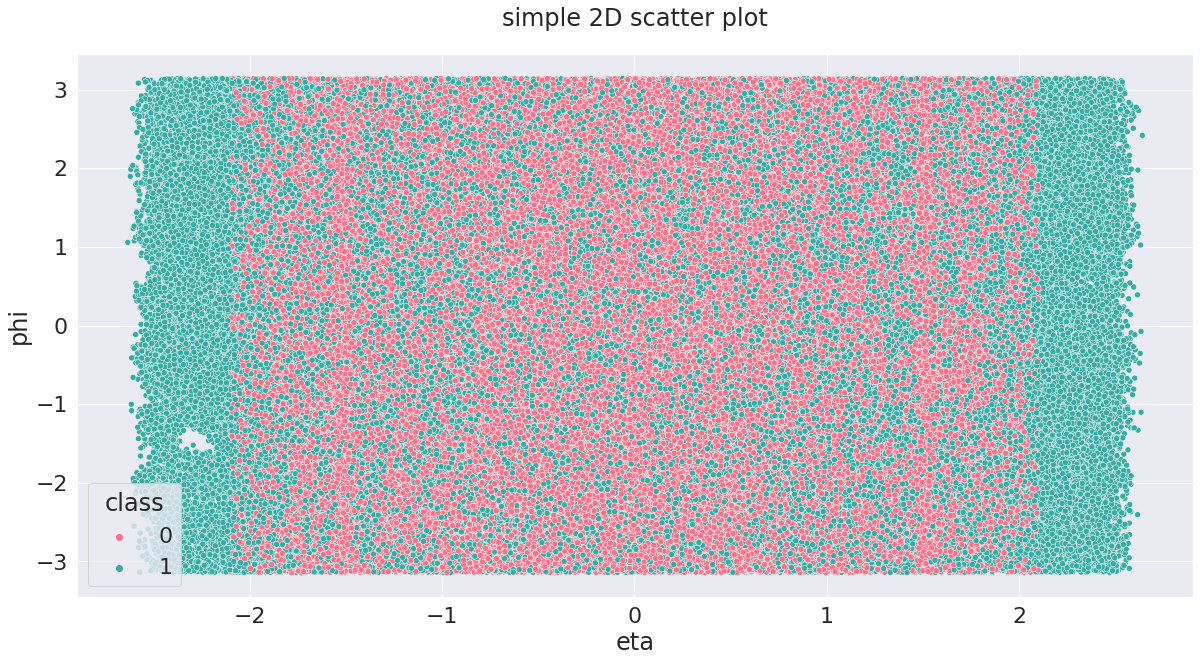

In [8]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='eta', y='phi', hue='class', palette="husl")

## 2. `MET` vs `eta` 

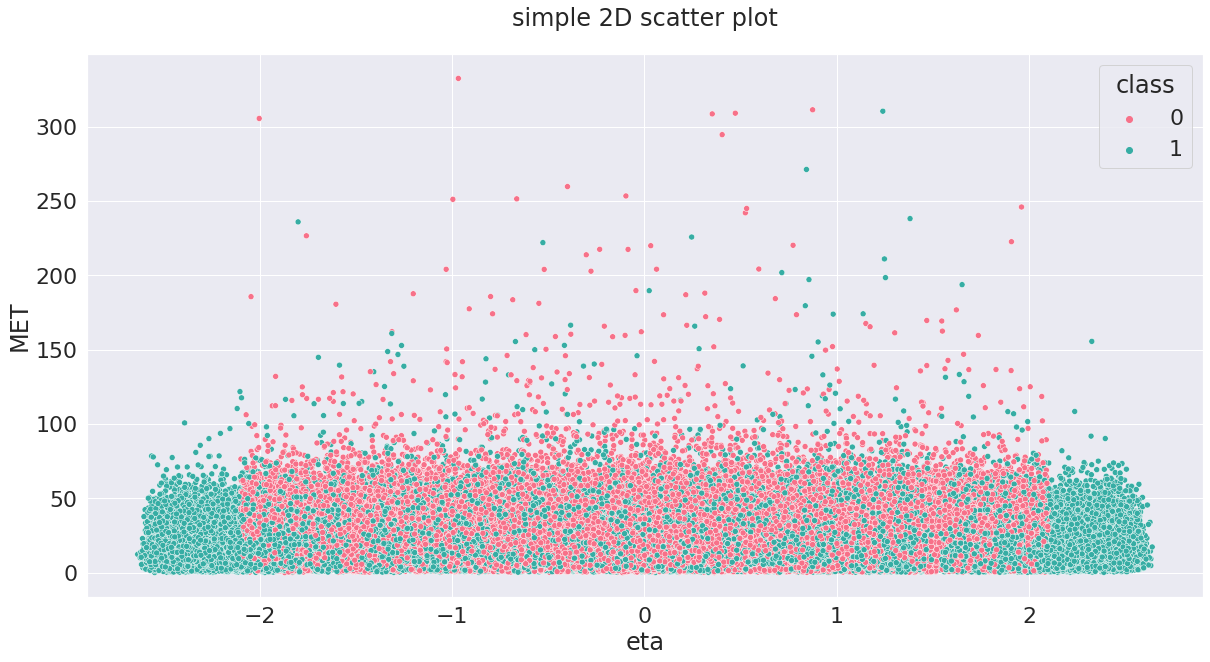

In [9]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='eta', y='MET', hue='class', palette="husl")

## 3. `phiMET` vs `eta` 

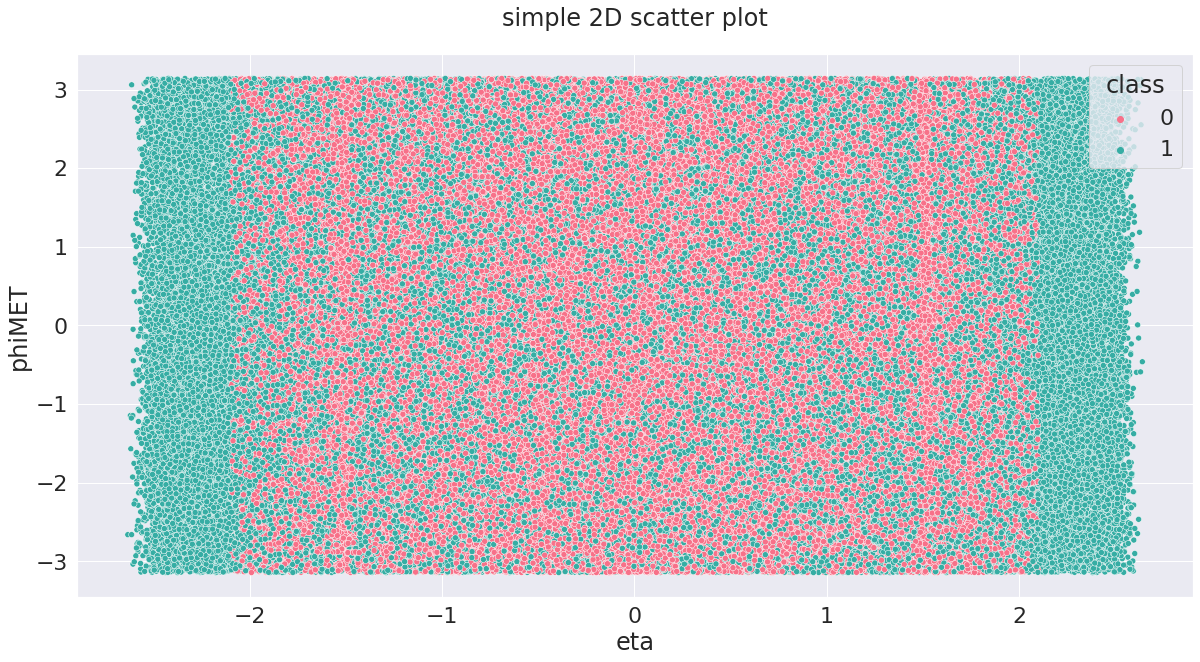

In [10]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='eta', y='phiMET', hue='class', palette="husl")

## 4. `MET` vs `phi` 

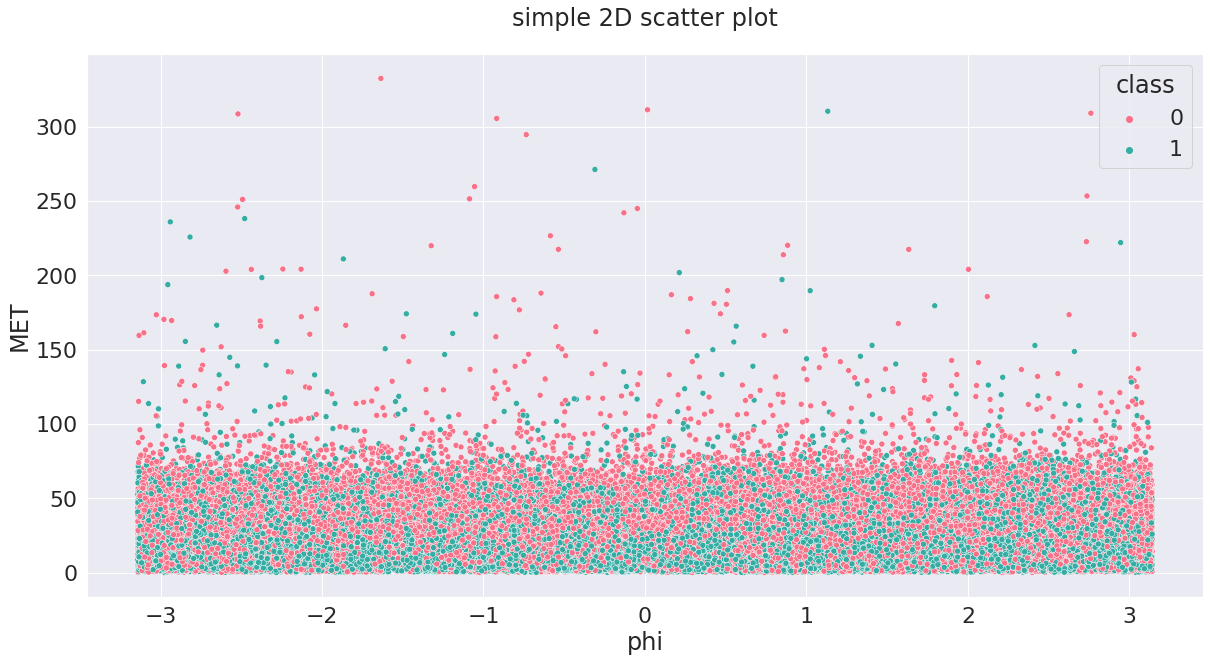

In [11]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='phi', y='MET', hue='class', palette="husl")

## 5. `phiMET` vs `phi` 

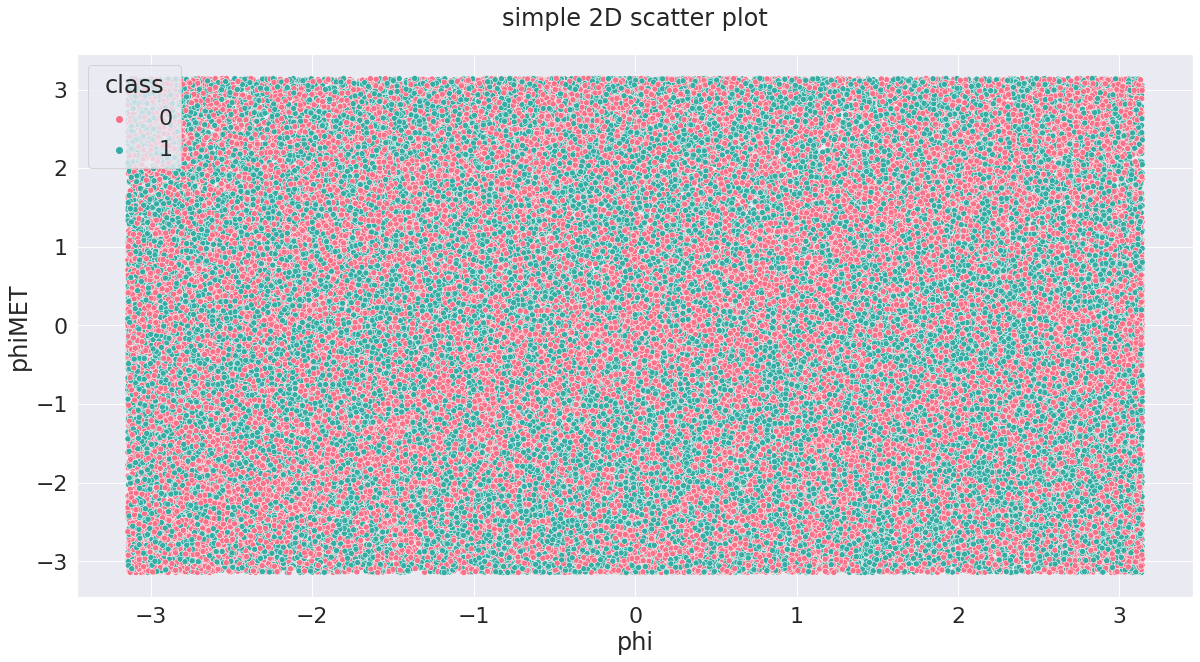

In [12]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df, x='phi', y='phiMET', hue='class', palette="husl")

# I use the Seaborn `heatmap()` function to determine which features have the most impact on `class`.

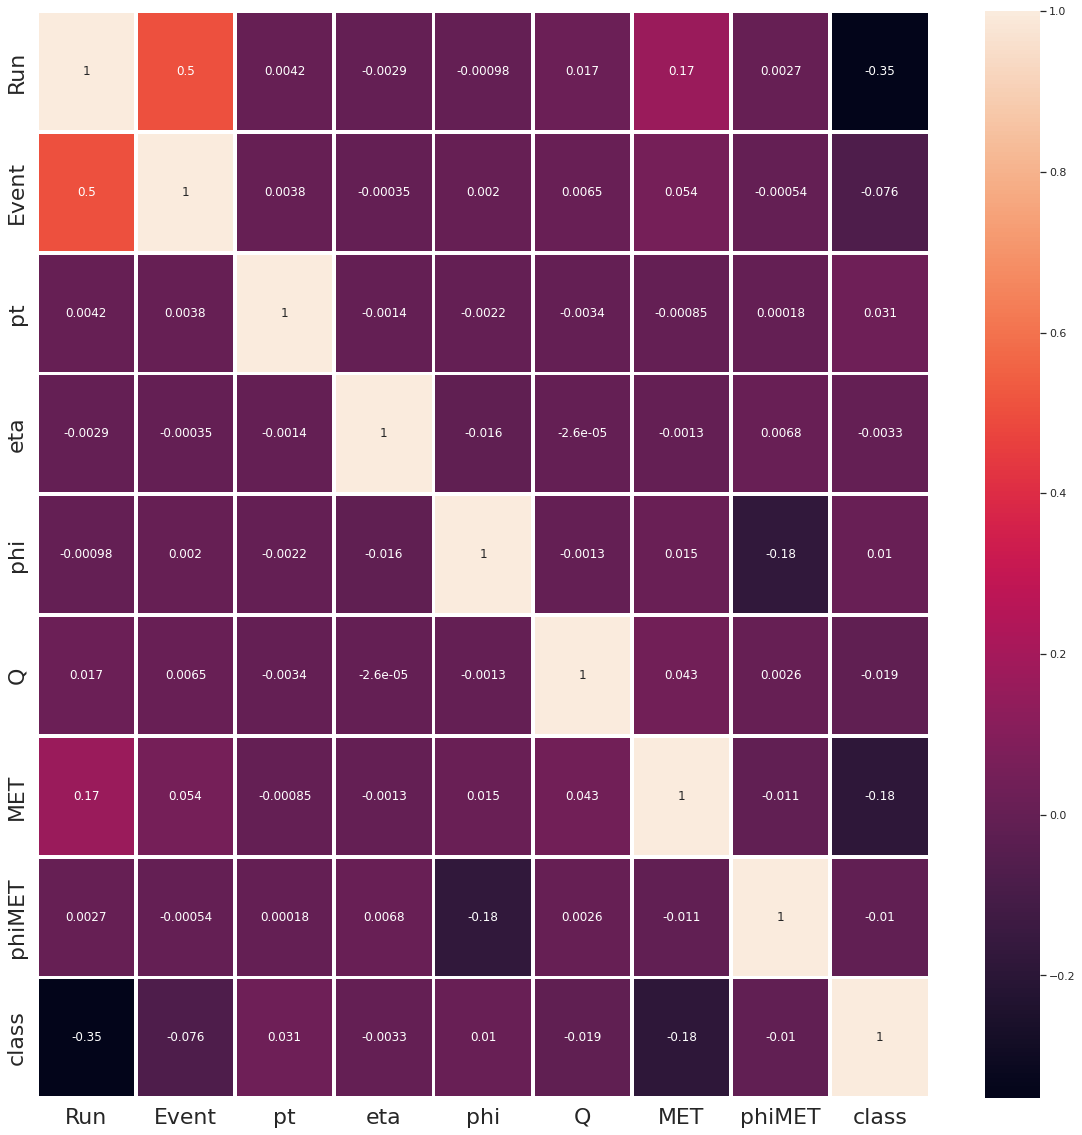

In [13]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax)

# As can be seen, the class is only affected by Run (- 0.35) and MET (- 0.18).

# The next step is to create a model to distinguish between two events (**Wmunu** & **Wenu**) using TensorFlow.

## First of all, I split the DataFrame into X (data) and Y (label), where:

In [14]:
X = df.drop(['class', 'Event'], axis=1)
y = df['class']  

## Using a train-test split, I split X and Y into train and test data.


*   Train Dataset: Used to fit model.
*   Test Dataset: Used to evaluate the fit model.



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## TensorFlow
The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor.

## To convert DataFrame to a tensor, I use tf.convert_to_tensor

In [16]:
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(160000, 7), dtype=float64, numpy=
array([[ 1.71484e+05,  1.10235e+02,  1.64370e+00, ..., -1.00000e+00,
         5.28266e+01, -1.10670e+00],
       [ 1.63296e+05,  2.51348e+01,  1.35200e-01, ...,  1.00000e+00,
         1.14042e+01,  1.19040e+00],
       [ 1.72400e+05,  3.74733e+01,  9.62100e-01, ..., -1.00000e+00,
         1.30150e+01,  1.64030e+00],
       ...,
       [ 1.71446e+05,  4.06311e+01, -6.00000e-02, ...,  1.00000e+00,
         1.39792e+01,  4.65000e-02],
       [ 1.63296e+05,  3.45075e+01, -2.78300e-01, ...,  1.00000e+00,
         1.44397e+01,  2.79530e+00],
       [ 1.71446e+05,  4.93564e+01, -8.34000e-01, ...,  1.00000e+00,
         1.38406e+01,  3.43400e-01]])>

In [17]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(40000, 7), dtype=float64, numpy=
array([[ 1.67102e+05,  3.97119e+01,  7.68300e-01, ...,  1.00000e+00,
         4.07324e+01, -2.62400e+00],
       [ 1.63759e+05,  2.96866e+01, -1.99480e+00, ...,  1.00000e+00,
         2.58536e+01, -3.07570e+00],
       [ 1.65567e+05,  4.00670e+01,  2.19240e+00, ..., -1.00000e+00,
         1.31171e+01,  1.00340e+00],
       ...,
       [ 1.63296e+05,  4.35754e+01, -1.13950e+00, ...,  1.00000e+00,
         6.10237e+01, -1.06960e+00],
       [ 1.72400e+05,  2.86907e+01,  1.10230e+00, ...,  1.00000e+00,
         3.94216e+01,  1.40970e+00],
       [ 1.66161e+05,  4.00306e+01,  7.79100e-01, ..., -1.00000e+00,
         2.87181e+01,  6.43000e-01]])>

## Normalize X_train, X_test

In [18]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)

In [19]:
X_test_scaled = tf.keras.layers.Normalization(axis=-1)
X_test_scaled.adapt(X_test)

## Building a simple neural network model
The compile function takes three arguments: optimizer, loss, and metrics.


*   **Optimizer**: These are certain algorithms that are used to change the attributes of the neural network to decrease the loss rate.
*   **Loss**: This is used to compute the quantity that a model should seek to minimize during training.


*   **Metrics**: This is used to judge the performance of the model.





## Model: There are two hidden layers, each with `64 neurons` and an activation function of `sigmoid`, `epochs = 500`.

In [20]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test)) 

Epoch 1/500
5000/5000 [==============================] - 12s 2ms/step - loss: 0.5860 - accuracy: 0.7043 - val_loss: 0.5725 - val_accuracy: 0.7221
Epoch 2/500
5000/5000 [==============================] - 13s 3ms/step - loss: 0.5471 - accuracy: 0.7291 - val_loss: 0.5208 - val_accuracy: 0.7370
Epoch 3/500
5000/5000 [==============================] - 13s 3ms/step - loss: 0.5028 - accuracy: 0.7554 - val_loss: 0.4808 - val_accuracy: 0.7711
Epoch 4/500
5000/5000 [==============================] - 12s 2ms/step - loss: 0.4615 - accuracy: 0.7844 - val_loss: 0.4413 - val_accuracy: 0.8001
Epoch 5/500
5000/5000 [==============================] - 12s 2ms/step - loss: 0.4299 - accuracy: 0.8078 - val_loss: 0.4194 - val_accuracy: 0.8163
Epoch 6/500
5000/5000 [==============================] - 12s 2ms/step - loss: 0.4155 - accuracy: 0.8176 - val_loss: 0.4097 - val_accuracy: 0.8191
Epoch 7/500
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4084 - accuracy: 0.8203 - val_loss: 0.4041 -

## Evaluating the model
I create plots from the collected history data.


*   A plot of accuracy on the training and validation datasets over training epochs.
*   A plot of loss on the training and validation datasets over training epochs.



1250/1250 - 3s - loss: 0.1457 - accuracy: 0.9457 - 3s/epoch - 3ms/step


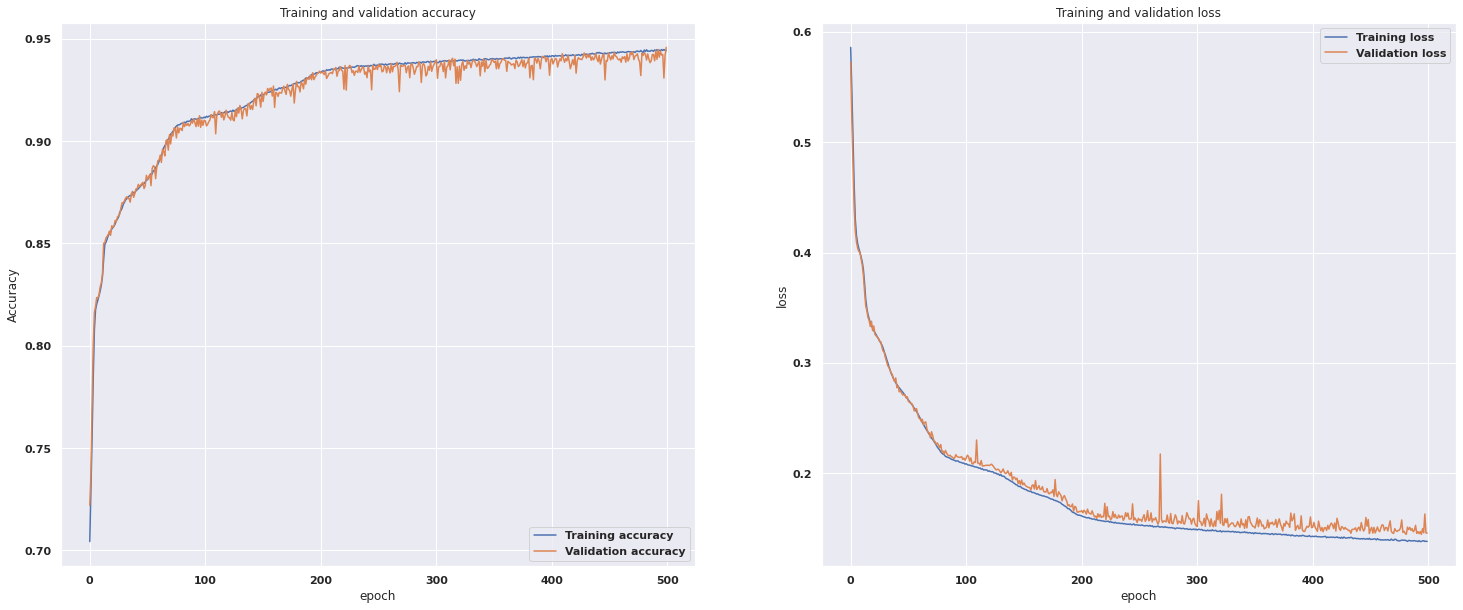

In [21]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(25,10))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

According to the plot of loss, validation loss is decreasing before the 500th epoch, so the model is underfitting. However, after the 500th epoch, Validation loss is converging. At the 500th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 94%. The goal of Deep Learning training is to find a balance between a model that is underfitting and one that is overfitting(converging), resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 500th epoch, as shown above. At that point, the training process can be stopped.